In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

directory = 'data/raw/'
df_list = []

In [17]:
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        df_list.append(pd.read_json(f))

In [18]:
columns = []
for df in df_list:
    columns.append(df.columns)

In [19]:
df = pd.concat(df_list, axis=0)

In [20]:
df: pd.DataFrame

In [21]:
df.to_csv('data/merged.csv', index=False)

In [22]:
def check_nan(df: pd.DataFrame):
    return df.isna().sum()


In [23]:
df.describe()

,fw,lts,af,ttl,size,dup,rcvd,sent,min,max,avg,msm_id,prb_id,timestamp,group_id,step,stored_timestamp
count,4725.000000,4725.000000,4725.0,4702.000000,4725.0,4725.000000,4725.000000,4725.000000,4725.000000,4725.000000,4725.000000,4.725000e+03,4.725000e+03,4725,4.725000e+03,0.0,4.725000e+03
mean,5076.224339,233.019683,4.0,58.580391,48.0,0.000423,2.979048,2.996190,77.115308,81.202517,78.855355,5.375972e+07,3.615085e+04,2023-05-15 18:49:33.036402176,5.375972e+07,NaN,1.684177e+09
min,4740.000000,-1.000000,4.0,33.000000,48.0,0.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,5.375971e+07,1.117200e+04,2023-05-15 18:49:14,5.375971e+07,NaN,1.684177e+09
25%,5080.000000,14.000000,4.0,50.000000,48.0,0.000000,3.000000,3.000000,28.512958,30.443554,29.521320,5.375972e+07,1.887300e+04,2023-05-15 18:49:24,5.375972e+07,NaN,1.684177e+09
50%,5080.000000,35.000000,4.0,53.000000,48.0,0.000000,3.000000,3.000000,43.321689,46.639673,44.812215,5.375972e+07,2.763200e+04,2023-05-15 18:49:31,5.375972e+07,NaN,1.684177e+09
75%,5080.000000,89.000000,4.0,55.000000,48.0,0.000000,3.000000,3.000000,107.637059,112.699870,109.600181,5.375972e+07,3.477200e+04,2023-05-15 18:49:40,5.375972e+07,NaN,1.684177e+09
max,5080.000000,857326.000000,4.0,253.000000,48.0,1.000000,3.000000,3.000000,2881.238795,2881.238795,2881.238795,5.375973e+07,1.005558e+06,2023-05-15 18:50:50,5.375973e+07,NaN,1.684177e+09
std,33.194454,12471.581820,0.0,34.272408,0.0,0.020572,0.227700,0.068136,82.923515,88.120270,84.274834,4.168520e+00,8.095051e+04,NaN,4.168520e+00,NaN,1.388552e+01


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4725 entries, 0 to 895
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fw                4725 non-null   int64         
 1   mver              4670 non-null   object        
 2   lts               4725 non-null   int64         
 3   dst_name          4725 non-null   object        
 4   af                4725 non-null   int64         
 5   dst_addr          4725 non-null   object        
 6   src_addr          4725 non-null   object        
 7   proto             4725 non-null   object        
 8   ttl               4702 non-null   float64       
 9   size              4725 non-null   int64         
 10  result            4725 non-null   object        
 11  dup               4725 non-null   int64         
 12  rcvd              4725 non-null   int64         
 13  sent              4725 non-null   int64         
 14  min               4725 non-nul

In [25]:
check_nan(df)

fw                     0
mver                  55
lts                    0
dst_name               0
af                     0
dst_addr               0
src_addr               0
proto                  0
ttl                   23
size                   0
result                 0
dup                    0
rcvd                   0
sent                   0
min                    0
max                    0
avg                    0
msm_id                 0
prb_id                 0
timestamp              0
msm_name               0
from                   0
type                   0
group_id               0
step                4725
stored_timestamp       0
dtype: int64

## Drop step column

In [26]:
df.drop(['step'], axis=1, inplace=True)

In [27]:
check_nan(df)

fw                   0
mver                55
lts                  0
dst_name             0
af                   0
dst_addr             0
src_addr             0
proto                0
ttl                 23
size                 0
result               0
dup                  0
rcvd                 0
sent                 0
min                  0
max                  0
avg                  0
msm_id               0
prb_id               0
timestamp            0
msm_name             0
from                 0
type                 0
group_id             0
stored_timestamp     0
dtype: int64

In [28]:
df[['mver', 'ttl']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4725 entries, 0 to 895
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mver    4670 non-null   object 
 1   ttl     4702 non-null   float64
dtypes: float64(1), object(1)
memory usage: 110.7+ KB


## Dealing with 'mver' column

In [29]:
df['mver'].unique()

array(['2.2.1', '2.6.2', '2.4.0', '2.4.1', '2.6.3', nan, '2.6.1', '2.5.1',
       '2.4.2'], dtype=object)

In [30]:
# mver specifies the version of measurement code
df.drop(['mver'], axis=1, inplace=True)

## Dealing with 'ttl' column

In [31]:
df['ttl'].unique()

array([ 52.,  55.,  49.,  56.,  51.,  54.,  53.,  59.,  50.,  57.,  58.,
        44.,  46.,  47.,  48.,  60.,  35.,  42., 249.,  45., 241.,  63.,
        36.,  40., 243., 235.,  43.,  nan,  33., 242.,  34., 245., 248.,
        41., 247.,  37., 251.,  61., 244.,  38., 246., 250., 253., 232.,
       239.,  39.,  66., 236.])

<Axes: >

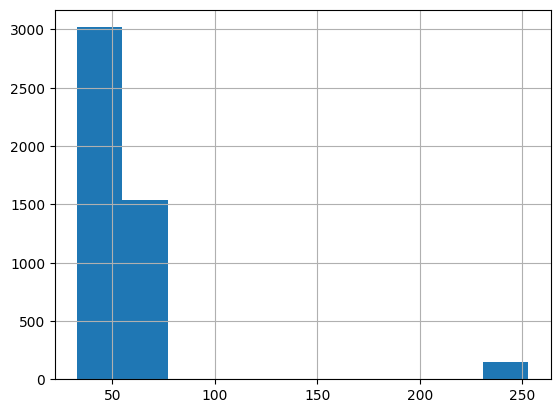

In [32]:
df['ttl'].hist()

In [33]:
# replace null in ttl column using median
df.fillna(df['ttl'].median(), inplace=True)

In [34]:
check_nan(df)

fw                  0
lts                 0
dst_name            0
af                  0
dst_addr            0
src_addr            0
proto               0
ttl                 0
size                0
result              0
dup                 0
rcvd                0
sent                0
min                 0
max                 0
avg                 0
msm_id              0
prb_id              0
timestamp           0
msm_name            0
from                0
type                0
group_id            0
stored_timestamp    0
dtype: int64

In [35]:
df.drop(['result'], axis=1, inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4725 entries, 0 to 895
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fw                4725 non-null   int64         
 1   lts               4725 non-null   int64         
 2   dst_name          4725 non-null   object        
 3   af                4725 non-null   int64         
 4   dst_addr          4725 non-null   object        
 5   src_addr          4725 non-null   object        
 6   proto             4725 non-null   object        
 7   ttl               4725 non-null   float64       
 8   size              4725 non-null   int64         
 9   dup               4725 non-null   int64         
 10  rcvd              4725 non-null   int64         
 11  sent              4725 non-null   int64         
 12  min               4725 non-null   float64       
 13  max               4725 non-null   float64       
 14  avg               4725 non-nul

In [37]:
df.drop(['dst_name', 'dst_addr', 'src_addr', 'proto'], axis=1, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4725 entries, 0 to 895
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fw                4725 non-null   int64         
 1   lts               4725 non-null   int64         
 2   af                4725 non-null   int64         
 3   ttl               4725 non-null   float64       
 4   size              4725 non-null   int64         
 5   dup               4725 non-null   int64         
 6   rcvd              4725 non-null   int64         
 7   sent              4725 non-null   int64         
 8   min               4725 non-null   float64       
 9   max               4725 non-null   float64       
 10  avg               4725 non-null   float64       
 11  msm_id            4725 non-null   int64         
 12  prb_id            4725 non-null   int64         
 13  timestamp         4725 non-null   datetime64[ns]
 14  msm_name          4725 non-nul

In [39]:
# only one value Ping
df['msm_name'].unique()

array(['Ping'], dtype=object)

In [40]:
df.drop(['msm_name'], axis=1, inplace=True)

In [41]:
df['from'].unique()


array(['102.135.245.208', '51.174.17.128', '174.130.69.103', ...,
       '188.242.17.90', '89.31.112.10', '79.24.36.163'], dtype=object)

In [42]:
df.drop(['from'], axis=1, inplace=True)

In [43]:
# only one value Ping
df['type'].unique()


array(['ping'], dtype=object)

In [44]:
df.drop(['type'], axis=1, inplace=True)


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4725 entries, 0 to 895
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fw                4725 non-null   int64         
 1   lts               4725 non-null   int64         
 2   af                4725 non-null   int64         
 3   ttl               4725 non-null   float64       
 4   size              4725 non-null   int64         
 5   dup               4725 non-null   int64         
 6   rcvd              4725 non-null   int64         
 7   sent              4725 non-null   int64         
 8   min               4725 non-null   float64       
 9   max               4725 non-null   float64       
 10  avg               4725 non-null   float64       
 11  msm_id            4725 non-null   int64         
 12  prb_id            4725 non-null   int64         
 13  timestamp         4725 non-null   datetime64[ns]
 14  group_id          4725 non-nul

In [46]:
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')

Index(['ttl', 'stored_timestamp', 'msm_id', 'group_id', 'rcvd', 'sent',
       'prb_id', 'lts', 'fw', 'dup', 'max', 'avg', 'min', 'af', 'size'],
      dtype='object')


d:\Studia II\Sem_II\MaAoWbS\mobile-and-analysis-of-web-based-systems\.venv\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\Studia II\Sem_II\MaAoWbS\mobile-and-analysis-of-web-based-systems\.venv\lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


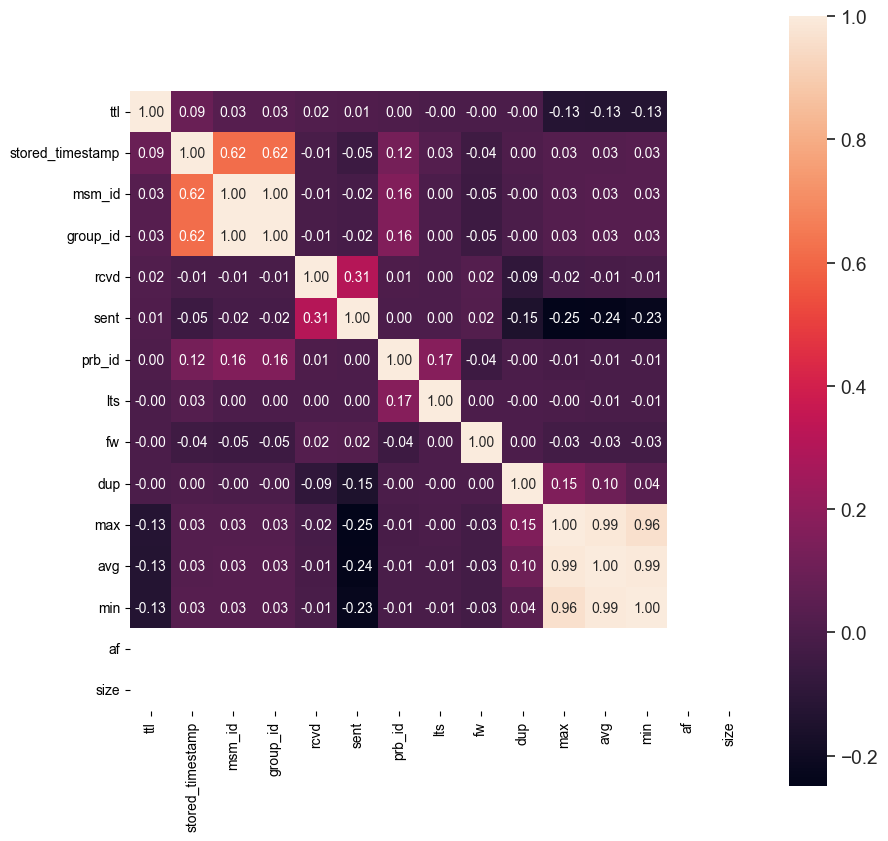

In [47]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Correlation matrix
corrmat = df[[col for col in df.columns if col != 'timestamp']].corr()

# Saleprice correlation matrix
k = 20 # numbers of variables in heatmap
cols = corrmat.nlargest(k, 'ttl')['ttl'].index
print(cols)
f, ax = plt.subplots(figsize=(10, 10))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

Text(0, 0.5, 'frequency')

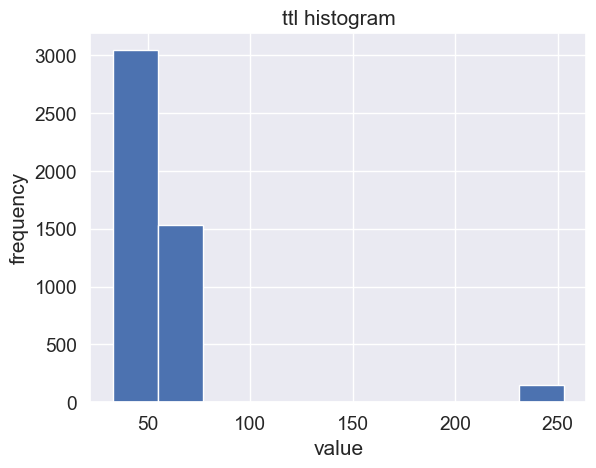

In [48]:
df['ttl'].hist()
plt.title('ttl histogram')
plt.xlabel('value')
plt.ylabel('frequency')

<Axes: xlabel='timestamp', ylabel='ttl'>

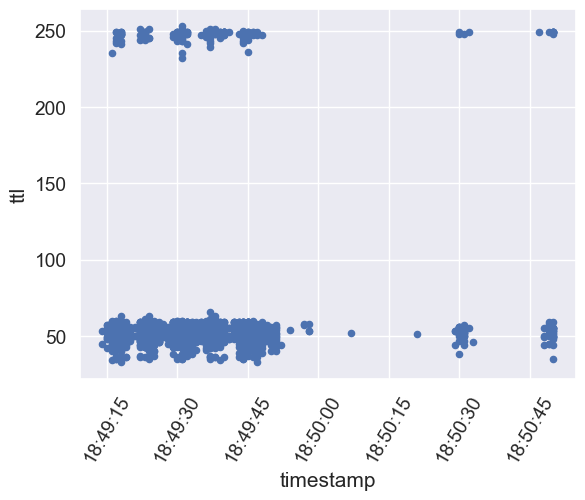

In [49]:
df.plot.scatter(x='timestamp', y='ttl', rot=60)

In [50]:
# Delete those rows?
df[df['sent'] != df['rcvd']]

,fw,lts,af,ttl,size,dup,rcvd,sent,min,max,avg,msm_id,prb_id,timestamp,group_id,stored_timestamp
376,5080,4,4,53.0,48,0,0,3,-1.000000,-1.000000,-1.000000,53759714,13100,2023-05-15 18:49:18,53759714,1684176558
495,5080,30,4,53.0,48,0,0,3,-1.000000,-1.000000,-1.000000,53759714,13732,2023-05-15 18:49:18,53759714,1684176559
581,5080,245,4,53.0,48,0,0,3,-1.000000,-1.000000,-1.000000,53759714,14307,2023-05-15 18:49:26,53759714,1684176557
903,5080,2,4,53.0,48,0,0,3,-1.000000,-1.000000,-1.000000,53759714,16884,2023-05-15 18:49:17,53759714,1684176558
105,5080,9,4,53.0,48,0,0,3,-1.000000,-1.000000,-1.000000,53759719,17832,2023-05-15 18:49:24,53759719,1684176565
181,5080,3,4,53.0,48,0,0,3,-1.000000,-1.000000,-1.000000,53759719,18387,2023-05-15 18:49:23,53759719,1684176565
230,5080,86,4,55.0,48,0,2,3,27.489503,28.141213,27.815358,53759719,18816,2023-05-15 18:49:25,53759719,1684176565
351,5080,1,4,53.0,48,0,0,3,-1.000000,-1.000000,-1.000000,53759719,19591,2023-05-15 18:49:25,53759719,1684176565
363,5080,4,4,55.0,48,0,2,3,53.615456,53.825827,53.720641,53759719,19651,2023-05-15 18:49:26,53759719,1684176567
373,5080,10,4,53.0,48,0,0,3,-1.000000,-1.000000,-1.000000,53759719,19701,2023-05-15 18:49:24,53759719,1684176564


In [51]:
df.to_csv(os.path.join('data', 'processed.csv'), index=False)

In [52]:
df

,fw,lts,af,ttl,size,dup,rcvd,sent,min,max,avg,msm_id,prb_id,timestamp,group_id,stored_timestamp
0,5020,28,4,52.0,48,0,3,3,178.934750,184.085613,180.997488,53759714,1000484,2023-05-15 18:49:17,53759714,1684176558
1,5080,58,4,55.0,48,0,3,3,38.114713,38.140848,38.132040,53759714,1000583,2023-05-15 18:49:18,53759714,1684176558
2,5030,45,4,49.0,48,0,3,3,115.511246,115.778055,115.610275,53759714,1003161,2023-05-15 18:49:17,53759714,1684176558
3,5040,42,4,56.0,48,0,3,3,20.367706,20.666381,20.519863,53759714,1003708,2023-05-15 18:49:17,53759714,1684176557
4,5080,30,4,52.0,48,0,3,3,12.628339,13.189510,12.850039,53759714,1004260,2023-05-15 18:49:17,53759714,1684176558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,5080,96,4,52.0,48,0,3,3,25.680500,26.924708,26.233055,53759726,53749,2023-05-15 18:49:45,53759726,1684176584
892,5080,21,4,53.0,48,0,3,3,8.495208,8.800000,8.620847,53759726,53754,2023-05-15 18:49:44,53759726,1684176585
893,5080,27,4,45.0,48,0,3,3,50.635125,51.349750,50.914861,53759726,53962,2023-05-15 18:49:44,53759726,1684176584
894,5080,43,4,52.0,48,0,3,3,114.468918,118.128364,115.746388,53759726,1000879,2023-05-15 18:50:07,53759726,1684176608
